In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from bmcs_cross_section.api import AnaFRPBending


Making home directory if it doesn't exist to save the data in local disc

In [11]:
home_dir = Path().home()
ml_data = home_dir / 'ml_data'
if not ml_data.exists():
    ml_data.mkdir()

## Loading the training space


Loading data which is already generated:

In [12]:
Design_space = np.load(ml_data / 'Design_space2.npy')
moment_capacity = np.load(ml_data / 'Mu2.npy')

## Visualization of the admissible design space for defined moment capacity
### a. 3D_scatted visualization of the design space classified by different reinforcment ratios 

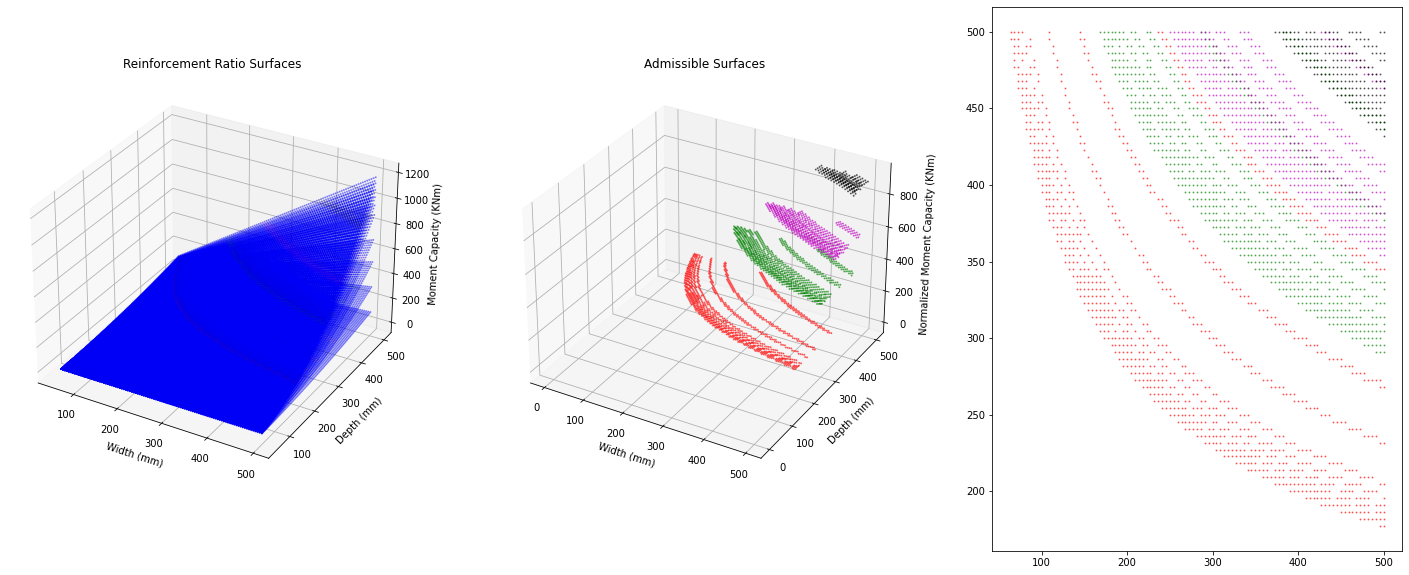

In [13]:

def plot_points_within_tolerance(Design_space, moment_capacity, target_Mu, tolerance, plot_step_reinforcement_ratio,colors, ax1, ax2, ax3):
    for i in np.unique(Design_space[:, 0])[::plot_step_reinforcement_ratio]:
        subset = Design_space[Design_space[:, 0] == i]
        z_values = np.array(moment_capacity[Design_space[:, 0] == i])
        for index, target_z_value in enumerate(target_Mu):
            within_tolerance = np.isclose(z_values, target_z_value, rtol=tolerance)
            colors_temp = [colors[index] if val else 'b' for val in within_tolerance]
            target_z_value_indices = np.where(within_tolerance)[0]  # Get indices of points satisfiying targeted moment capaciy
            # ax1 plots whole design space including inadmissible design space in blue and admissible in red
            ax1.scatter(subset[:, 1], subset[:, 2], z_values, color=colors_temp, alpha=0.1, s=1)
            # ax2 plots only the admissible design space linked by defined moment capacity
            ax2.scatter(subset[target_z_value_indices, 1], subset[target_z_value_indices, 2], z_values[target_z_value_indices], color=colors[index], alpha=0.5, s=1)
            ax3.scatter(subset[target_z_value_indices, 1], subset[target_z_value_indices, 2], color=colors[index], alpha=0.5, s=1)

fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133)
ax1.set_xlabel('Width (mm)')
ax1.set_ylabel('Depth (mm)')
ax1.set_zlabel('Moment Capacity (KNm)')
ax1.set_title('Reinforcement Ratio Surfaces')
ax2.set_xlabel('Width (mm)')
ax2.set_ylabel('Depth (mm)')
ax2.set_zlabel('Normalized Moment Capacity (KNm)')
ax2.set_title('Admissible Surfaces')

target_Mu = [150, 400, 600, 900]
colors = ['r', 'g', 'm', 'k']
tolerance = 0.02   # relative error for admissible 
plot_step_reinforcement_ratio = 10  # range of Reinf.R is from 0.1% to 2% in 100 step


plot_points_within_tolerance(Design_space, moment_capacity, target_Mu, tolerance, plot_step_reinforcement_ratio,colors, ax1, ax2, ax3)
plt.show()

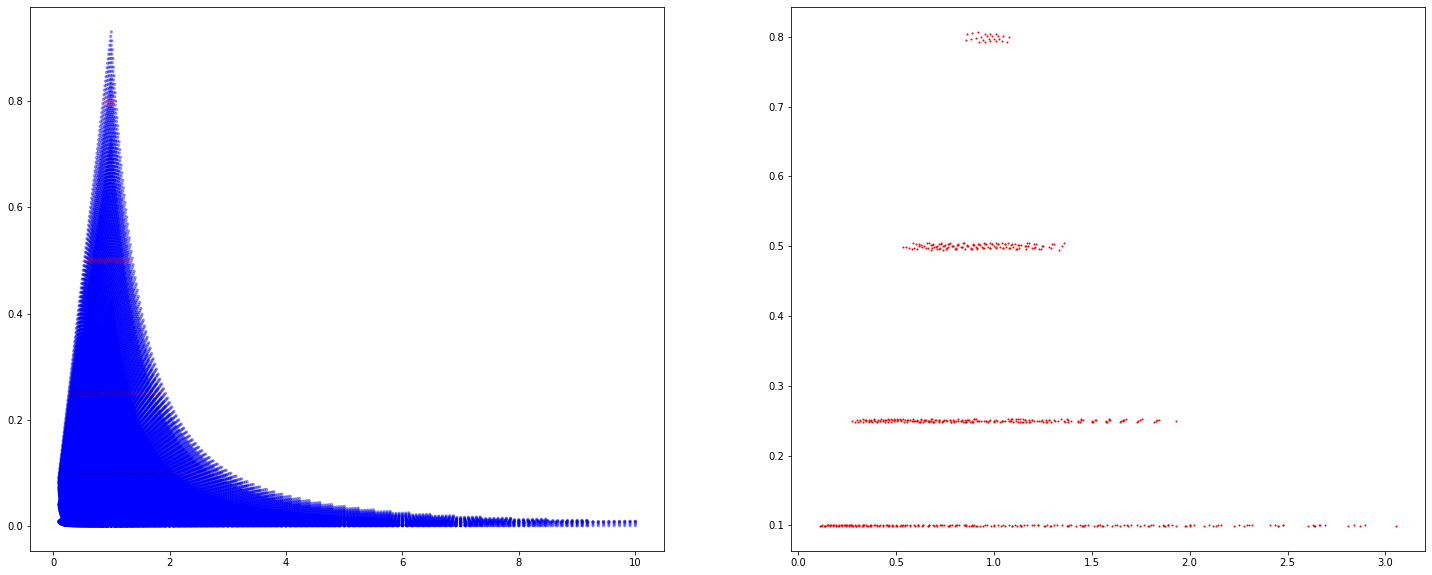

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

def NOND_points_within_tolerance(Design_space, moment_capacity_normalized_min_max, target_z_value, tolerance, step_reinforcement, ax1, ax2):
    index=0
    for i in np.unique(Design_space[:, 0])[::step_reinforcement]:
        subset = Design_space[Design_space[:, 0] == i]
        z_values = np.array(moment_capacity_normalized_min_max[Design_space[:, 0] == i])
        for target_z_value in target_Mu:
            within_tolerance = np.isclose(z_values, target_z_value, rtol=tolerance)
            colors = ['red' if val else 'blue' for val in within_tolerance]
            red_indices = np.where(within_tolerance)[0]  # Get indices of red points
            # ax1 plots whole design space including inadmissible design space in blue and admissible in red
            ax1.scatter(subset[:, 1]/ subset[:, 2], z_values, label=f"Set {int(i)}", color=colors, alpha=0.1, s=5)
            # ax2 plots only the admissible design space linked by defined moment capacity in red
            ax2.scatter(subset[red_indices, 1]/ subset[red_indices, 2], z_values[red_indices], label=f"Set {int(i)}", color='red', alpha=1, s=1)
        # index += 1
        # if index == 50:
        #     break
        

target_Mu = [0.1, 0.25, 0.5, 0.8]
tolerance = 0.01
plot_step_for_reinforcement_ratio = 20


NOND_points_within_tolerance(Design_space, moment_capacity, target_Mu, tolerance, plot_step_for_reinforcement_ratio, ax1, ax2)


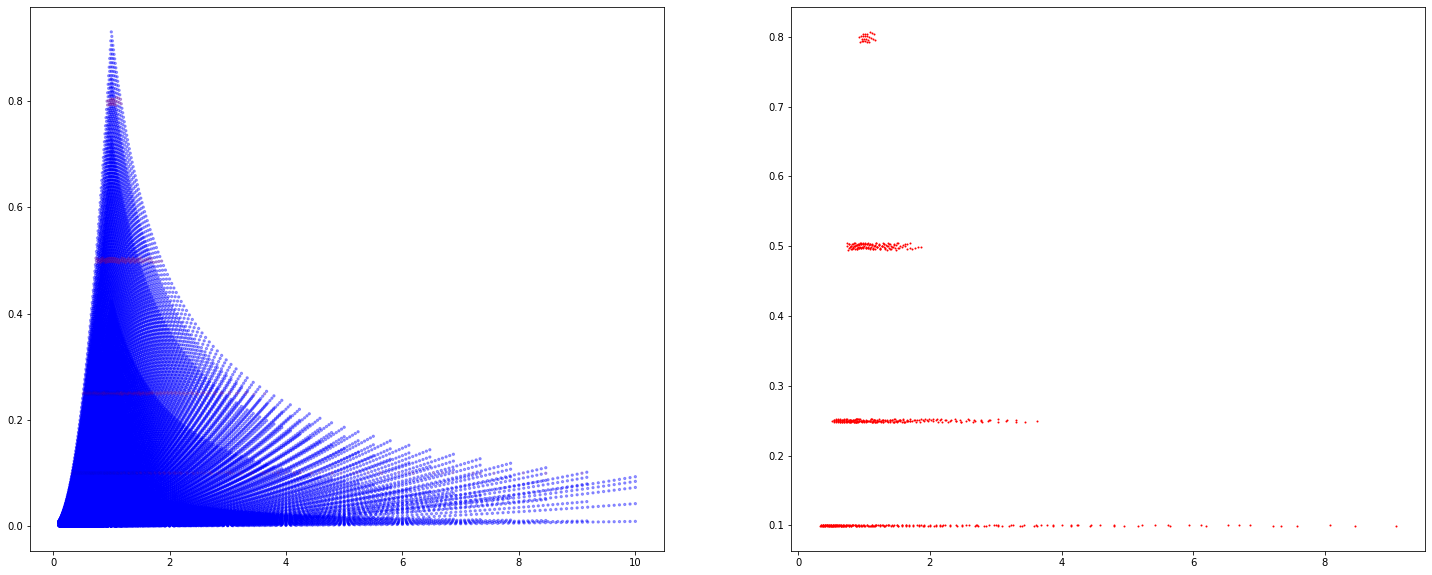

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

def NOND1_points_within_tolerance(Design_space, moment_capacity_normalized_min_max, target_z_value, tolerance, step_reinforcement, ax1, ax2):
    index=0
    for i in np.unique(Design_space[:, 0])[::step_reinforcement]:
        subset = Design_space[Design_space[:, 0] == i]
        z_values = np.array(moment_capacity_normalized_min_max[Design_space[:, 0] == i])
        for target_z_value in target_Mu:
            within_tolerance = np.isclose(z_values, target_z_value, rtol=tolerance)
            colors = ['red' if val else 'blue' for val in within_tolerance]
            red_indices = np.where(within_tolerance)[0]  # Get indices of red points
            # ax1 plots whole design space including inadmissible design space in blue and admissible in red
            ax1.scatter(subset[:, 2]/ subset[:, 1], z_values, label=f"Set {int(i)}", color=colors, alpha=0.1, s=5)
            # ax2 plots only the admissible design space linked by defined moment capacity in red
            ax2.scatter(subset[red_indices, 2]/ subset[red_indices, 1], z_values[red_indices], label=f"Set {int(i)}", color='red', alpha=1, s=1)
        # index += 1
        # if index == 50:
        #     break
        
target_Mu = [0.1, 0.25, 0.5, 0.8]
tolerance = 0.01
plot_step_for_reinforcement_ratio = 20


NOND1_points_within_tolerance(Design_space, moment_capacity, target_Mu, tolerance, plot_step_for_reinforcement_ratio, ax1, ax2)
